In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#this is the neighbors catalogue
import pandas as pd
df_result = pd.read_hdf('/content/gdrive/MyDrive/galah_neighbors_catalog/neighbors_0.h5') #change the file accordingly

#this part only for testing, comment these lines in prod
#df_result = df_result[['11','336','339']]

In [4]:
!pip install vaex

     |████████████████████████████████| 2.5 MB 27.3 MB/s 
     |████████████████████████████████| 101 kB 8.3 MB/s 
     |████████████████████████████████| 42 kB 588 kB/s 
     |████████████████████████████████| 952 kB 33.8 MB/s 
     |████████████████████████████████| 11.7 MB 22.7 MB/s 
     |████████████████████████████████| 2.9 MB 40.8 MB/s 
     |████████████████████████████████| 106 kB 72.2 MB/s 
     |████████████████████████████████| 1.2 MB 49.8 MB/s 
     |████████████████████████████████| 3.3 MB 39.4 MB/s 
     |████████████████████████████████| 260 kB 39.6 MB/s 
     |████████████████████████████████| 3.4 MB 24.9 MB/s 
     |████████████████████████████████| 2.7 MB 34.0 MB/s 
     |████████████████████████████████| 275 kB 56.7 MB/s 
  Created wheel for aplus: filename=aplus-0.11.0-py3-none-any.whl size=4408 sha256=23e05ffd67832fea4956c80c72b6370692ca2ac0b13d2506b50e4bf87f6f557e
  Stored in directory: /root/.cache/pip/wheels/31/ec/1c/cdb682cb8c1d3d1dca4214e96b4845d6d775f78c1067

In [5]:
#load and read the target stars
import vaex
df_vaex = vaex.open('/content/gdrive/MyDrive/neighbors_with_snr.hdf5') #the og

In [6]:
#match the target with the catalogue
#for example, neighbors_0 is for target 0 - 2000
#df_target = df_vaex[0:2000] #the prod
df_target = df_vaex
df_target = df_target.to_pandas_df()
#df_target = df_target.loc[df_target['sobject_id_1'].isin(['170723002601253','170602005201064','170119003101004'])]
#df_target = df_target.reset_index() #11, 336, 339

In [7]:
df_target.head()

,sobject_id_1,teff,logg,fe_h,ebv_bstep,snr_c2_iraf
0,160611004002055,6306.316895,3.223915,-1.136428,1.231661,110.271296
1,170120002101379,4955.729004,1.135623,-0.566111,1.147119,11.868907
2,160402006601077,4638.069336,1.489801,-1.179531,1.145011,80.475358
3,160611004002068,4896.653320,2.630486,0.010713,1.128435,91.963059
4,160520004901160,5176.607910,0.936461,-0.562122,1.114073,34.011246


In [8]:
#create catalogue for reading the parameter
df_refer = df_vaex
df_refer = df_refer.to_pandas_df()

In [9]:
#rename the column, comment this line in prod
#df_result = df_result.rename(columns={'11': '0', '336': '1', '339': '2'})
df_result[:10]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
157906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.508310e+14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.705160e+14,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.705160e+14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.707250e+14,NaN,NaN,NaN,1.707250e+14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.707250e+14,NaN,NaN,NaN
157914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.403130e+14,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
from astropy.io import fits
from scipy import interpolate
from tqdm import tqdm
import numpy as np
from astropy.table import Table
from astropy.table import QTable

In [27]:
def create_table(l_n, l_t):
  #l_n = list of neighbors
  #l_t = list target

  if len(l_n) == 0:
    pass
  else:
    try:
      #t_spectra = fits.open(path + str(l_t[i])+ "2.fits", memmap = True)
      #fits.open(archive.open('galah_c2/dr3/spectra/hermes/1311160005010022.fits'))
      t_spectra = fits.open(archive.open(path + str(l_t[i]) + "2.fits"))
      f_obj = t_spectra[4].data #flux of the spectra
      e_obj = t_spectra[1].data #error of flux
      disp_start = t_spectra[4].header['CRVAL1'] - (t_spectra[4].header['CRPIX1'] - 1) * t_spectra[4].header['CDELT1'] #at which wavelength the dispersion starts
      w_obj = wav(disp_start, t_spectra[4].header['CDELT1'], np.linspace(1, len(f_obj), len(f_obj)))

      min_wav = []
      max_wav = []

      print("target " + str(i))
  
      for j in tqdm(range(len(l_n))):
        #read the file that contains the neighbors
        #print("target " + str(j))
        spectra = fits.open(archive.open(path + str(l_n[j]) + "2.fits"))

        #flux of the spectra
        f = spectra[4].data 
    
        #wavelength construction
        disp_start = spectra[4].header['CRVAL1'] - (spectra[4].header['CRPIX1'] - 1) * spectra[4].header['CDELT1'] #at which wavelength the dispersion starts
        w = wav(disp_start, spectra[4].header['CDELT1'], np.linspace(1, len(f), len(f)))
    
        #append min and max wavelength value
        min_wav.append(w[0])
        max_wav.append(w[-1])

      print("maximum of start wavelength " + str(max(min_wav)))
      print("maximum of end wavelength " + str(min(max_wav)))
      print("------------------------------")

      print('start of w_obj ' + str((w_obj[0])))
      print('end of w_obj ' + str((w_obj[-1])))


      #define start and end wavelength based on the neighbors spectra
      nearest_index_max_start_wav = min(range(len(w_obj)), key=lambda i: abs(w_obj[i]-max(min_wav)))
      if w_obj[nearest_index_max_start_wav] < max(min_wav):
        nearest_index_max_start_wav = nearest_index_max_start_wav + 1

      nearest_index_min_end_wav = min(range(len(w_obj)), key=lambda i: abs(w_obj[i]-min(max_wav)))
      if w_obj[nearest_index_min_end_wav] > min(max_wav):
        nearest_index_min_end_wav = nearest_index_min_end_wav - 1
  
      w_obj = w_obj[nearest_index_max_start_wav:nearest_index_min_end_wav]
      f_obj = f_obj[nearest_index_max_start_wav:nearest_index_min_end_wav]
      e_obj = e_obj[nearest_index_max_start_wav:nearest_index_min_end_wav]

      e_obj = e_obj.tolist()

      matrix_of_flux = []
      for j in tqdm(range(len(l_n))):
        #read the file that contains the neighbors
        #print("target " + str(j))
        try:
          spectra = fits.open(archive.open(path + str(l_n[j]) + "2.fits"))
    
          #flux of the spectra
          f = spectra[4].data 
    
          #wavelength construction
          disp_start = spectra[4].header['CRVAL1'] - (spectra[4].header['CRPIX1'] - 1) * spectra[4].header['CDELT1'] #at which wavelength the dispersion starts
          w = wav(disp_start, spectra[4].header['CDELT1'], np.linspace(1, len(f), len(f)))

          #interpolate to selected range object spectra
          interpolation = interpolate.interp1d(w, f)
          f = interpolation(w_obj)
    
          matrix_of_flux.append(pd.Series(f, name=str(i)))
          #print(type(matrix_of_flux))
        except:
          pass
    except:
      pass
  
    result = pd.concat(matrix_of_flux, axis=1)
    result = result.assign(w_obj = w_obj, f_obj = f_obj, e_obj = e_obj, f_mean = result.mean(1), f_stddev = result.std(1))
    #result.to_csv('/content/gdrive/MyDrive/spectra/' + str(df_target.sobject_id_1.values[i])+'2a.csv', columns = ["w_obj", "f_obj", "e_obj","f_mean", "f_stddev"])
    selection = ["w_obj", "f_obj", "e_obj","f_mean", "f_stddev"]
    result_tab = Table(result[selection].values)

    return result_tab

In [12]:
#collection of function
def wav(c0, c1, x):
    return c0 + (c1*x)

In [13]:
#empty list to save the # of neighbors

n_neighbors = np.zeros((2000,5))

In [14]:
!pip install rarfile

In [15]:
import rarfile
archive = rarfile.RarFile('/content/gdrive/MyDrive/galah_c2.rar', 'r')

In [ ]:
#Testing using the function to create table
path = 'galah_c2/dr3/spectra/hermes/'
for i in range(7,2001): #+1 from the n of the target
  print(str(i))
  print("____________________________________________")

  #1. Lan, all
  list_of_neighbors_ori = df_result[str(i)].dropna() #Lan, all
  df_ln = list_of_neighbors_ori.to_frame()
  df_ln = df_ln.reset_index(drop = True)
  
  #list_of_neighbors = list_of_neighbors_ori.astype(np.int64)
  list_of_neighbors = list_of_neighbors_ori.tolist()
  list_of_neighbors = [round(num) for num in list_of_neighbors]

  if len(list_of_neighbors) == 0:
    pass

  else:
    a = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=np.int32)
    b = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    c = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    d = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    e = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    t = Table([a, b, c, d, e], names=('a', 'b', 'c', 'd', 'e'))

    the_result_lanall = create_table(list_of_neighbors, df_target.sobject_id_1.values)

    #check the whole stellar parameter
    neighbors_table = df_ln.merge(df_refer, left_on=str(i), right_on='sobject_id_1')
  
    #2. Lan, SNR 30
    #refer to the refer table to check wether they meet SNR >= 30 requirement
    ln_lan30 = neighbors_table.loc[neighbors_table['snr_c2_iraf'] >= 30.0]
    #print(ln_lan30)
    #print("---")
    #print(len(ln_lan30))

    #the_result = create_table(list_of_neighbors, df_target.sobject_id_1.values)
    if len(ln_lan30) != 0:
      the_result_lan30 = create_table(ln_lan30.sobject_id_1.values, df_target.sobject_id_1.values)
    #print(the_result_lan30)
    elif len(ln_lan30) == 0:
      the_result_lan30 = t

    #3. DR, all
    ln_drall = neighbors_table.loc[neighbors_table['teff'] <= (df_target['teff'][i] + 67)]
    ln_drall = ln_drall.loc[ln_drall['teff'] >= (df_target['teff'][i] - 67)]
    ln_drall = ln_drall.loc[ln_drall['logg'] <= (df_target['logg'][i] + 0.12)]
    ln_drall = ln_drall.loc[ln_drall['logg'] >= (df_target['logg'][i] - 0.12)]
    
    if df_target['fe_h'][i] > 0:
      ln_drall = ln_drall.loc[ln_drall['fe_h'] >= (df_target['fe_h'][i] + 0.034)]
      ln_drall = ln_drall.loc[ln_drall['fe_h'] <= (df_target['fe_h'][i] - 0.034)]
    
    else:
      ln_drall = ln_drall.loc[ln_drall['fe_h'] >= (df_target['fe_h'][i] - 0.034)]
      ln_drall = ln_drall.loc[ln_drall['fe_h'] <= (df_target['fe_h'][i] + 0.034)]

    if len(ln_drall) != 0:
     the_result_drall = create_table(ln_drall.sobject_id_1.values, df_target.sobject_id_1.values)
    elif len(ln_drall) == 0:
      the_result_drall = t

    ln_dr30 = ln_drall.loc[ln_drall['snr_c2_iraf'] >= 30.0]

    if len(ln_dr30) != 0:
       the_result_dr30 = create_table(ln_dr30.sobject_id_1.values, df_target.sobject_id_1.values)
    elif len(ln_dr30) == 0:
      the_result_dr30 = t

    #saving the #
    n_neighbors[i] = (df_target.sobject_id_1.values[i],len(list_of_neighbors),
                      len(ln_lan30), len(ln_drall), len(ln_dr30))

    hdu_list = fits.HDUList([
        fits.PrimaryHDU(),
        fits.table_to_hdu(the_result_lanall),
        fits.table_to_hdu(the_result_lan30),
        fits.table_to_hdu(the_result_drall),
        fits.table_to_hdu(the_result_dr30),
    ])
    hdu_list.writeto('/content/gdrive/MyDrive/spectra/' + str(df_target.sobject_id_1.values[i])+'2_model.fits')
np.savetxt('/content/gdrive/MyDrive/spectra/n_neighbors_0.csv', np.c_[n_neighbors], fmt = '%s', delimiter = ',')

7
____________________________________________







  0%|          | 0/1 [00:00<?, ?it/s]

target 7







100%|██████████| 1/1 [00:00<00:00,  1.06it/s]





  0%|          | 0/1 [00:00<?, ?it/s]

maximum of start wavelength 5649.698560856822
maximum of end wavelength 5873.755851342393
------------------------------
start of w_obj 5649.352817518413
end of w_obj 5873.833615307673







100%|██████████| 1/1 [00:00<00:00,  3.78it/s]





  0%|          | 0/1 [00:00<?, ?it/s]

target 7







100%|██████████| 1/1 [00:00<00:00,  4.09it/s]





  0%|          | 0/1 [00:00<?, ?it/s]

maximum of start wavelength 5649.698560856822
maximum of end wavelength 5873.755851342393
------------------------------
start of w_obj 5649.352817518413
end of w_obj 5873.833615307673







100%|██████████| 1/1 [00:00<00:00,  4.09it/s]


8
____________________________________________
9
____________________________________________







  0%|          | 0/3 [00:00<?, ?it/s]

target 9







 33%|███▎      | 1/3 [00:00<00:00,  2.01it/s]




 67%|██████▋   | 2/3 [00:01<00:00,  1.98it/s]




100%|██████████| 3/3 [00:01<00:00,  1.96it/s]





  0%|          | 0/3 [00:00<?, ?it/s]

maximum of start wavelength 5647.781200234648
maximum of end wavelength 5865.552168126503
------------------------------
start of w_obj 5650.496276675952
end of w_obj 5874.432287695043







 33%|███▎      | 1/3 [00:00<00:00,  4.09it/s]




 67%|██████▋   | 2/3 [00:00<00:00,  4.03it/s]




100%|██████████| 3/3 [00:00<00:00,  3.95it/s]





  0%|          | 0/3 [00:00<?, ?it/s]

target 9







 33%|███▎      | 1/3 [00:00<00:00,  4.26it/s]




 67%|██████▋   | 2/3 [00:00<00:00,  4.20it/s]




100%|██████████| 3/3 [00:00<00:00,  3.95it/s]





  0%|          | 0/3 [00:00<?, ?it/s]

maximum of start wavelength 5647.781200234648
maximum of end wavelength 5865.552168126503
------------------------------
start of w_obj 5650.496276675952
end of w_obj 5874.432287695043







 33%|███▎      | 1/3 [00:00<00:00,  4.05it/s]




 67%|██████▋   | 2/3 [00:00<00:00,  4.01it/s]




100%|██████████| 3/3 [00:00<00:00,  3.83it/s]


10
____________________________________________
11
____________________________________________







  0%|          | 0/287 [00:00<?, ?it/s]

target 11







  0%|          | 1/287 [00:00<02:44,  1.73it/s]




  1%|          | 2/287 [00:01<03:01,  1.57it/s]




  1%|          | 3/287 [00:02<03:01,  1.56it/s]




  1%|▏         | 4/287 [00:02<03:18,  1.43it/s]




  2%|▏         | 5/287 [00:03<03:04,  1.53it/s]




  2%|▏         | 6/287 [00:03<02:55,  1.60it/s]




  2%|▏         | 7/287 [00:04<02:46,  1.68it/s]




  3%|▎         | 8/287 [00:05<02:44,  1.69it/s]




  3%|▎         | 9/287 [00:05<02:36,  1.78it/s]




  3%|▎         | 10/287 [00:06<02:38,  1.75it/s]




  4%|▍         | 11/287 [00:06<02:37,  1.76it/s]




  4%|▍         | 12/287 [00:07<02:33,  1.79it/s]




  5%|▍         | 13/287 [00:07<02:34,  1.78it/s]




  5%|▍         | 14/287 [00:08<02:51,  1.59it/s]




  5%|▌         | 15/287 [00:09<02:48,  1.62it/s]




  6%|▌         | 16/287 [00:09<02:38,  1.71it/s]




  6%|▌         | 17/287 [00:10<02:30,  1.79it/s]




  6%|▋         | 18/287 [00:10<02:31,  1.77it/s]




  7%|▋         | 19/287 [00:11<02:29,  1.79it/s]



maximum of start wavelength 5651.7697937074245
maximum of end wavelength 5870.262798106401
------------------------------
start of w_obj 5648.0361118317705
end of w_obj 5872.002339735559







  0%|          | 1/287 [00:00<01:09,  4.12it/s]




  1%|          | 2/287 [00:00<01:09,  4.10it/s]




  1%|          | 3/287 [00:00<01:09,  4.09it/s]




  1%|▏         | 4/287 [00:00<01:09,  4.09it/s]




  2%|▏         | 5/287 [00:01<01:09,  4.05it/s]




  2%|▏         | 6/287 [00:01<01:09,  4.03it/s]




  2%|▏         | 7/287 [00:01<01:09,  4.05it/s]




  3%|▎         | 8/287 [00:01<01:09,  4.00it/s]




  3%|▎         | 9/287 [00:02<01:09,  4.01it/s]




  3%|▎         | 10/287 [00:02<01:09,  4.01it/s]




  4%|▍         | 11/287 [00:02<01:08,  4.04it/s]




  4%|▍         | 12/287 [00:02<01:08,  4.02it/s]




  5%|▍         | 13/287 [00:03<01:08,  4.03it/s]




  5%|▍         | 14/287 [00:03<01:06,  4.10it/s]




  5%|▌         | 15/287 [00:03<01:06,  4.10it/s]




  6%|▌         | 16/287 [00:03<01:06,  4.06it/s]




  6%|▌         | 17/287 [00:04<01:06,  4.04it/s]




  6%|▋         | 18/287 [00:04<01:05,  4.08it/s]




  7%|▋         | 19/287 [00:04<01:05,  4.10it/s]



target 11







  0%|          | 1/218 [00:00<00:53,  4.09it/s]




  1%|          | 2/218 [00:00<00:53,  4.05it/s]




  1%|▏         | 3/218 [00:00<00:53,  4.05it/s]




  2%|▏         | 4/218 [00:00<00:52,  4.10it/s]




  2%|▏         | 5/218 [00:01<00:51,  4.11it/s]




  3%|▎         | 6/218 [00:01<00:51,  4.13it/s]




  3%|▎         | 7/218 [00:01<00:52,  4.02it/s]




  4%|▎         | 8/218 [00:01<00:52,  4.01it/s]




  4%|▍         | 9/218 [00:02<00:51,  4.04it/s]




  5%|▍         | 10/218 [00:02<00:51,  4.05it/s]




  5%|▌         | 11/218 [00:02<00:51,  4.01it/s]




  6%|▌         | 12/218 [00:02<00:51,  4.03it/s]




  6%|▌         | 13/218 [00:03<00:50,  4.07it/s]




  6%|▋         | 14/218 [00:03<00:50,  4.04it/s]




  7%|▋         | 15/218 [00:03<00:50,  4.00it/s]




  7%|▋         | 16/218 [00:03<00:50,  4.02it/s]




  8%|▊         | 17/218 [00:04<00:49,  4.03it/s]




  8%|▊         | 18/218 [00:04<00:48,  4.09it/s]




  9%|▊         | 19/218 [00:04<00:49,  4.04it/s]



maximum of start wavelength 5651.143127895048
maximum of end wavelength 5870.373708686787
------------------------------
start of w_obj 5648.0361118317705
end of w_obj 5872.002339735559







  0%|          | 1/218 [00:00<00:52,  4.15it/s]




  1%|          | 2/218 [00:00<00:52,  4.11it/s]




  1%|▏         | 3/218 [00:00<00:52,  4.11it/s]




  2%|▏         | 4/218 [00:00<00:52,  4.10it/s]




  2%|▏         | 5/218 [00:01<00:52,  4.09it/s]




  3%|▎         | 6/218 [00:01<00:52,  4.03it/s]




  3%|▎         | 7/218 [00:01<00:52,  4.01it/s]




  4%|▎         | 8/218 [00:01<00:51,  4.05it/s]




  4%|▍         | 9/218 [00:02<00:51,  4.08it/s]




  5%|▍         | 10/218 [00:02<00:51,  4.04it/s]




  5%|▌         | 11/218 [00:02<00:50,  4.06it/s]




  6%|▌         | 12/218 [00:02<00:51,  4.03it/s]




  6%|▌         | 13/218 [00:03<00:50,  4.03it/s]




  6%|▋         | 14/218 [00:03<00:50,  4.05it/s]




  7%|▋         | 15/218 [00:03<00:50,  4.02it/s]




  7%|▋         | 16/218 [00:03<00:50,  3.99it/s]




  8%|▊         | 17/218 [00:04<00:49,  4.07it/s]




  8%|▊         | 18/218 [00:04<00:48,  4.09it/s]




  9%|▊         | 19/218 [00:04<00:49,  4.06it/s]



target 11







  8%|▊         | 1/13 [00:00<00:02,  4.03it/s]




 15%|█▌        | 2/13 [00:00<00:02,  4.06it/s]




 23%|██▎       | 3/13 [00:00<00:02,  4.00it/s]




 31%|███       | 4/13 [00:00<00:02,  4.02it/s]




 38%|███▊      | 5/13 [00:01<00:02,  3.99it/s]




 46%|████▌     | 6/13 [00:01<00:01,  4.01it/s]




 54%|█████▍    | 7/13 [00:01<00:01,  4.02it/s]




 62%|██████▏   | 8/13 [00:01<00:01,  4.03it/s]




 69%|██████▉   | 9/13 [00:02<00:00,  4.07it/s]




 77%|███████▋  | 10/13 [00:02<00:00,  4.01it/s]




 85%|████████▍ | 11/13 [00:02<00:00,  3.99it/s]




 92%|█████████▏| 12/13 [00:02<00:00,  4.00it/s]




100%|██████████| 13/13 [00:03<00:00,  3.99it/s]





  0%|          | 0/13 [00:00<?, ?it/s]

maximum of start wavelength 5650.287388803847
maximum of end wavelength 5871.183129442087
------------------------------
start of w_obj 5648.0361118317705
end of w_obj 5872.002339735559







  8%|▊         | 1/13 [00:00<00:02,  4.10it/s]




 15%|█▌        | 2/13 [00:00<00:02,  4.02it/s]




 23%|██▎       | 3/13 [00:00<00:02,  4.04it/s]




 31%|███       | 4/13 [00:00<00:02,  4.08it/s]




 38%|███▊      | 5/13 [00:01<00:01,  4.04it/s]




 46%|████▌     | 6/13 [00:01<00:01,  4.03it/s]




 54%|█████▍    | 7/13 [00:01<00:01,  4.06it/s]




 62%|██████▏   | 8/13 [00:01<00:01,  4.04it/s]




 69%|██████▉   | 9/13 [00:02<00:00,  4.06it/s]




 77%|███████▋  | 10/13 [00:02<00:00,  4.05it/s]




 85%|████████▍ | 11/13 [00:02<00:00,  4.02it/s]




 92%|█████████▏| 12/13 [00:02<00:00,  3.98it/s]




100%|██████████| 13/13 [00:03<00:00,  4.01it/s]





  0%|          | 0/10 [00:00<?, ?it/s]

target 11







 10%|█         | 1/10 [00:00<00:02,  4.12it/s]




 20%|██        | 2/10 [00:00<00:01,  4.14it/s]




 30%|███       | 3/10 [00:00<00:01,  4.11it/s]




 40%|████      | 4/10 [00:00<00:01,  4.02it/s]




 50%|█████     | 5/10 [00:01<00:01,  4.03it/s]




 60%|██████    | 6/10 [00:01<00:00,  4.08it/s]




 70%|███████   | 7/10 [00:01<00:00,  4.03it/s]




 80%|████████  | 8/10 [00:01<00:00,  4.00it/s]




 90%|█████████ | 9/10 [00:02<00:00,  4.02it/s]




100%|██████████| 10/10 [00:02<00:00,  4.02it/s]





  0%|          | 0/10 [00:00<?, ?it/s]

maximum of start wavelength 5650.287388803847
maximum of end wavelength 5871.183129442087
------------------------------
start of w_obj 5648.0361118317705
end of w_obj 5872.002339735559







 10%|█         | 1/10 [00:00<00:02,  4.12it/s]




 20%|██        | 2/10 [00:00<00:01,  4.09it/s]




 30%|███       | 3/10 [00:00<00:01,  4.08it/s]




 40%|████      | 4/10 [00:00<00:01,  4.10it/s]




 50%|█████     | 5/10 [00:01<00:01,  4.03it/s]




 60%|██████    | 6/10 [00:01<00:00,  4.00it/s]




 70%|███████   | 7/10 [00:01<00:00,  3.98it/s]




 80%|████████  | 8/10 [00:01<00:00,  4.03it/s]




 90%|█████████ | 9/10 [00:02<00:00,  4.09it/s]




100%|██████████| 10/10 [00:02<00:00,  4.02it/s]


12
____________________________________________
13
____________________________________________
14
____________________________________________







  0%|          | 0/9 [00:00<?, ?it/s]

target 14







 11%|█         | 1/9 [00:00<00:06,  1.27it/s]




 22%|██▏       | 2/9 [00:01<00:04,  1.46it/s]




 33%|███▎      | 3/9 [00:01<00:03,  1.64it/s]




 44%|████▍     | 4/9 [00:02<00:02,  1.72it/s]




 56%|█████▌    | 5/9 [00:02<00:02,  1.59it/s]




 67%|██████▋   | 6/9 [00:03<00:01,  1.72it/s]




 78%|███████▊  | 7/9 [00:03<00:01,  1.85it/s]




 89%|████████▉ | 8/9 [00:04<00:00,  1.91it/s]




100%|██████████| 9/9 [00:05<00:00,  1.76it/s]





  0%|          | 0/9 [00:00<?, ?it/s]

maximum of start wavelength 5650.09097009621
maximum of end wavelength 5870.961450541181
------------------------------
start of w_obj 5649.364279119014
end of w_obj 5873.329082804686







 11%|█         | 1/9 [00:00<00:01,  4.00it/s]




 22%|██▏       | 2/9 [00:00<00:01,  3.98it/s]




 33%|███▎      | 3/9 [00:00<00:01,  4.00it/s]




 44%|████▍     | 4/9 [00:01<00:01,  4.02it/s]




 56%|█████▌    | 5/9 [00:01<00:00,  4.01it/s]




 67%|██████▋   | 6/9 [00:01<00:00,  3.97it/s]




 78%|███████▊  | 7/9 [00:01<00:00,  3.95it/s]




 89%|████████▉ | 8/9 [00:02<00:00,  3.95it/s]




100%|██████████| 9/9 [00:02<00:00,  3.94it/s]





  0%|          | 0/9 [00:00<?, ?it/s]

target 14







 11%|█         | 1/9 [00:00<00:01,  4.06it/s]




 22%|██▏       | 2/9 [00:00<00:01,  4.04it/s]




 33%|███▎      | 3/9 [00:00<00:01,  4.02it/s]




 44%|████▍     | 4/9 [00:01<00:01,  4.00it/s]




 56%|█████▌    | 5/9 [00:01<00:00,  4.05it/s]




 67%|██████▋   | 6/9 [00:01<00:00,  4.01it/s]




 78%|███████▊  | 7/9 [00:01<00:00,  3.97it/s]




 89%|████████▉ | 8/9 [00:02<00:00,  4.00it/s]




100%|██████████| 9/9 [00:02<00:00,  4.01it/s]





  0%|          | 0/9 [00:00<?, ?it/s]

maximum of start wavelength 5650.09097009621
maximum of end wavelength 5870.961450541181
------------------------------
start of w_obj 5649.364279119014
end of w_obj 5873.329082804686







 11%|█         | 1/9 [00:00<00:02,  3.94it/s]




 22%|██▏       | 2/9 [00:00<00:01,  3.94it/s]




 33%|███▎      | 3/9 [00:00<00:01,  3.98it/s]




 44%|████▍     | 4/9 [00:01<00:01,  3.99it/s]




 56%|█████▌    | 5/9 [00:01<00:01,  3.94it/s]




 67%|██████▋   | 6/9 [00:01<00:00,  3.93it/s]




 78%|███████▊  | 7/9 [00:01<00:00,  3.87it/s]




 89%|████████▉ | 8/9 [00:02<00:00,  3.84it/s]




100%|██████████| 9/9 [00:02<00:00,  3.90it/s]


15
____________________________________________







  0%|          | 0/223 [00:00<?, ?it/s]

target 15







  0%|          | 1/223 [00:00<01:43,  2.14it/s]




  1%|          | 2/223 [00:00<01:43,  2.13it/s]




  1%|▏         | 3/223 [00:01<01:43,  2.12it/s]




  2%|▏         | 4/223 [00:01<01:46,  2.06it/s]




  2%|▏         | 5/223 [00:02<02:00,  1.81it/s]




  3%|▎         | 6/223 [00:03<01:54,  1.89it/s]




  3%|▎         | 7/223 [00:03<01:52,  1.92it/s]




  4%|▎         | 8/223 [00:04<01:58,  1.81it/s]




  4%|▍         | 9/223 [00:05<02:16,  1.57it/s]




  4%|▍         | 10/223 [00:05<02:07,  1.67it/s]




  5%|▍         | 11/223 [00:06<02:01,  1.75it/s]




  5%|▌         | 12/223 [00:06<01:51,  1.89it/s]




  6%|▌         | 13/223 [00:07<01:49,  1.92it/s]




  6%|▋         | 14/223 [00:07<01:51,  1.87it/s]




  7%|▋         | 15/223 [00:08<01:47,  1.93it/s]




  7%|▋         | 16/223 [00:08<01:46,  1.95it/s]




  8%|▊         | 17/223 [00:09<01:43,  1.99it/s]




  8%|▊         | 18/223 [00:09<01:43,  1.98it/s]




  9%|▊         | 19/223 [00:10<01:38,  2.06it/s]



maximum of start wavelength 5651.55848287811
maximum of end wavelength 5870.20188814933
------------------------------
start of w_obj 5647.767328267499
end of w_obj 5871.563103246956







  0%|          | 1/223 [00:00<00:52,  4.23it/s]




  1%|          | 2/223 [00:00<00:53,  4.13it/s]




  1%|▏         | 3/223 [00:00<00:53,  4.14it/s]




  2%|▏         | 4/223 [00:00<00:52,  4.14it/s]




  2%|▏         | 5/223 [00:01<00:52,  4.12it/s]




  3%|▎         | 6/223 [00:01<00:53,  4.07it/s]




  3%|▎         | 7/223 [00:01<00:54,  3.99it/s]




  4%|▎         | 8/223 [00:01<00:54,  3.98it/s]




  4%|▍         | 9/223 [00:02<00:53,  3.99it/s]




  4%|▍         | 10/223 [00:02<00:53,  3.96it/s]




  5%|▍         | 11/223 [00:02<00:52,  4.02it/s]




  5%|▌         | 12/223 [00:02<00:52,  4.03it/s]




  6%|▌         | 13/223 [00:03<00:52,  4.03it/s]




  6%|▋         | 14/223 [00:03<00:51,  4.07it/s]




  7%|▋         | 15/223 [00:03<00:51,  4.01it/s]




  7%|▋         | 16/223 [00:03<00:51,  4.04it/s]




  8%|▊         | 17/223 [00:04<00:51,  4.02it/s]




  8%|▊         | 18/223 [00:04<00:50,  4.05it/s]




  9%|▊         | 19/223 [00:04<00:50,  4.03it/s]



target 15







  1%|          | 1/181 [00:00<00:44,  4.07it/s]




  1%|          | 2/181 [00:00<00:44,  4.04it/s]




  2%|▏         | 3/181 [00:00<00:43,  4.05it/s]




  2%|▏         | 4/181 [00:01<00:44,  3.97it/s]




  3%|▎         | 5/181 [00:01<00:44,  3.97it/s]




  3%|▎         | 6/181 [00:01<00:44,  3.93it/s]




  4%|▍         | 7/181 [00:01<00:43,  3.99it/s]




  4%|▍         | 8/181 [00:02<00:45,  3.83it/s]




  5%|▍         | 9/181 [00:02<00:44,  3.90it/s]




  6%|▌         | 10/181 [00:02<00:43,  3.89it/s]




  6%|▌         | 11/181 [00:02<00:43,  3.92it/s]




  7%|▋         | 12/181 [00:03<00:43,  3.91it/s]




  7%|▋         | 13/181 [00:03<00:42,  3.95it/s]




  8%|▊         | 14/181 [00:03<00:42,  3.94it/s]




  8%|▊         | 15/181 [00:03<00:41,  4.00it/s]




  9%|▉         | 16/181 [00:04<00:41,  3.93it/s]




  9%|▉         | 17/181 [00:04<00:41,  3.99it/s]




 10%|▉         | 18/181 [00:04<00:40,  4.03it/s]




 10%|█         | 19/181 [00:04<00:40,  4.03it/s]



maximum of start wavelength 5651.55848287811
maximum of end wavelength 5870.440128143705
------------------------------
start of w_obj 5647.767328267499
end of w_obj 5871.563103246956







  1%|          | 1/181 [00:00<00:45,  3.95it/s]




  1%|          | 2/181 [00:00<00:45,  3.96it/s]




  2%|▏         | 3/181 [00:00<00:44,  3.96it/s]




  2%|▏         | 4/181 [00:01<00:44,  4.00it/s]




  3%|▎         | 5/181 [00:01<00:44,  3.98it/s]




  3%|▎         | 6/181 [00:01<00:43,  3.99it/s]




  4%|▍         | 7/181 [00:01<00:43,  3.97it/s]




  4%|▍         | 8/181 [00:02<00:43,  3.96it/s]




  5%|▍         | 9/181 [00:02<00:43,  3.98it/s]




  6%|▌         | 10/181 [00:02<00:43,  3.94it/s]




  6%|▌         | 11/181 [00:02<00:42,  4.00it/s]




  7%|▋         | 12/181 [00:03<00:42,  3.95it/s]




  7%|▋         | 13/181 [00:03<00:42,  3.95it/s]




  8%|▊         | 14/181 [00:03<00:41,  3.98it/s]




  8%|▊         | 15/181 [00:03<00:41,  4.00it/s]




  9%|▉         | 16/181 [00:04<00:40,  4.03it/s]




  9%|▉         | 17/181 [00:04<00:41,  3.97it/s]




 10%|▉         | 18/181 [00:04<00:40,  4.00it/s]




 10%|█         | 19/181 [00:04<00:40,  3.97it/s]



target 15







  8%|▊         | 1/13 [00:00<00:03,  3.93it/s]




 15%|█▌        | 2/13 [00:00<00:02,  3.92it/s]




 23%|██▎       | 3/13 [00:00<00:02,  3.95it/s]




 31%|███       | 4/13 [00:01<00:02,  3.88it/s]




 38%|███▊      | 5/13 [00:01<00:02,  3.95it/s]




 46%|████▌     | 6/13 [00:01<00:01,  3.95it/s]




 54%|█████▍    | 7/13 [00:01<00:01,  3.93it/s]




 62%|██████▏   | 8/13 [00:02<00:01,  3.96it/s]




 69%|██████▉   | 9/13 [00:02<00:01,  3.98it/s]




 77%|███████▋  | 10/13 [00:02<00:00,  3.96it/s]




 85%|████████▍ | 11/13 [00:02<00:00,  3.96it/s]




 92%|█████████▏| 12/13 [00:03<00:00,  3.96it/s]




100%|██████████| 13/13 [00:03<00:00,  3.96it/s]





  0%|          | 0/13 [00:00<?, ?it/s]

maximum of start wavelength 5649.54332566448
maximum of end wavelength 5871.855919341878
------------------------------
start of w_obj 5647.767328267499
end of w_obj 5871.563103246956







  8%|▊         | 1/13 [00:00<00:03,  3.90it/s]




 15%|█▌        | 2/13 [00:00<00:02,  3.94it/s]




 23%|██▎       | 3/13 [00:00<00:02,  3.98it/s]




 31%|███       | 4/13 [00:01<00:02,  3.95it/s]




 38%|███▊      | 5/13 [00:01<00:02,  3.93it/s]




 46%|████▌     | 6/13 [00:01<00:01,  3.97it/s]




 54%|█████▍    | 7/13 [00:01<00:01,  3.96it/s]




 62%|██████▏   | 8/13 [00:02<00:01,  3.96it/s]




 69%|██████▉   | 9/13 [00:02<00:01,  3.94it/s]




 77%|███████▋  | 10/13 [00:02<00:00,  3.98it/s]




 85%|████████▍ | 11/13 [00:02<00:00,  3.95it/s]




 92%|█████████▏| 12/13 [00:03<00:00,  3.96it/s]




100%|██████████| 13/13 [00:03<00:00,  3.93it/s]





  0%|          | 0/12 [00:00<?, ?it/s]

target 15







  8%|▊         | 1/12 [00:00<00:02,  3.97it/s]




 17%|█▋        | 2/12 [00:00<00:02,  3.95it/s]




 25%|██▌       | 3/12 [00:00<00:02,  3.90it/s]




 33%|███▎      | 4/12 [00:01<00:02,  3.89it/s]




 42%|████▏     | 5/12 [00:01<00:01,  3.92it/s]




 50%|█████     | 6/12 [00:01<00:01,  3.92it/s]




 58%|█████▊    | 7/12 [00:01<00:01,  3.83it/s]




 67%|██████▋   | 8/12 [00:02<00:01,  3.88it/s]




 75%|███████▌  | 9/12 [00:02<00:00,  3.89it/s]




 83%|████████▎ | 10/12 [00:02<00:00,  3.95it/s]




 92%|█████████▏| 11/12 [00:02<00:00,  3.90it/s]




100%|██████████| 12/12 [00:03<00:00,  3.90it/s]





  0%|          | 0/12 [00:00<?, ?it/s]

maximum of start wavelength 5649.54332566448
maximum of end wavelength 5871.855919341878
------------------------------
start of w_obj 5647.767328267499
end of w_obj 5871.563103246956







  8%|▊         | 1/12 [00:00<00:02,  3.81it/s]




 17%|█▋        | 2/12 [00:00<00:02,  3.84it/s]




 25%|██▌       | 3/12 [00:00<00:02,  3.86it/s]




 33%|███▎      | 4/12 [00:01<00:02,  3.84it/s]




 42%|████▏     | 5/12 [00:01<00:01,  3.88it/s]




 50%|█████     | 6/12 [00:01<00:01,  3.88it/s]




 58%|█████▊    | 7/12 [00:01<00:01,  3.85it/s]




 67%|██████▋   | 8/12 [00:02<00:01,  3.90it/s]




 75%|███████▌  | 9/12 [00:02<00:00,  3.91it/s]




 83%|████████▎ | 10/12 [00:02<00:00,  3.87it/s]




 92%|█████████▏| 11/12 [00:02<00:00,  3.88it/s]




100%|██████████| 12/12 [00:03<00:00,  3.86it/s]


16
____________________________________________
17
____________________________________________







  0%|          | 0/36 [00:00<?, ?it/s]

target 17







  3%|▎         | 1/36 [00:00<00:25,  1.37it/s]




  6%|▌         | 2/36 [00:01<00:25,  1.35it/s]




  8%|▊         | 3/36 [00:02<00:22,  1.47it/s]




 11%|█         | 4/36 [00:02<00:20,  1.58it/s]




 14%|█▍        | 5/36 [00:03<00:21,  1.43it/s]




 17%|█▋        | 6/36 [00:03<00:19,  1.53it/s]




 19%|█▉        | 7/36 [00:04<00:17,  1.68it/s]




 22%|██▏       | 8/36 [00:05<00:16,  1.69it/s]




 25%|██▌       | 9/36 [00:05<00:15,  1.76it/s]




 28%|██▊       | 10/36 [00:06<00:14,  1.78it/s]




 31%|███       | 11/36 [00:06<00:14,  1.73it/s]




 33%|███▎      | 12/36 [00:06<00:11,  2.07it/s]




 36%|███▌      | 13/36 [00:07<00:11,  2.07it/s]




 39%|███▉      | 14/36 [00:07<00:10,  2.04it/s]




 42%|████▏     | 15/36 [00:08<00:10,  2.07it/s]




 44%|████▍     | 16/36 [00:09<00:11,  1.70it/s]




 47%|████▋     | 17/36 [00:09<00:11,  1.70it/s]




 50%|█████     | 18/36 [00:10<00:10,  1.66it/s]




 53%|█████▎    | 19/36 [00:11<00:10,  1.67it/s]




 56%|█████▌    |

maximum of start wavelength 5652.808217224773
maximum of end wavelength 5864.203240392084
------------------------------
start of w_obj 5649.986263622464
end of w_obj 5873.794482220011







  3%|▎         | 1/36 [00:00<00:09,  3.82it/s]




  6%|▌         | 2/36 [00:00<00:08,  3.79it/s]




  8%|▊         | 3/36 [00:00<00:08,  3.75it/s]




 11%|█         | 4/36 [00:01<00:08,  3.74it/s]




 14%|█▍        | 5/36 [00:01<00:08,  3.77it/s]




 17%|█▋        | 6/36 [00:01<00:07,  3.81it/s]




 19%|█▉        | 7/36 [00:01<00:07,  3.83it/s]




 22%|██▏       | 8/36 [00:02<00:07,  3.80it/s]




 25%|██▌       | 9/36 [00:02<00:07,  3.84it/s]




 28%|██▊       | 10/36 [00:02<00:06,  3.88it/s]




 31%|███       | 11/36 [00:02<00:06,  3.88it/s]




 33%|███▎      | 12/36 [00:03<00:06,  3.87it/s]




 36%|███▌      | 13/36 [00:03<00:05,  3.88it/s]




 39%|███▉      | 14/36 [00:03<00:05,  3.86it/s]




 42%|████▏     | 15/36 [00:03<00:05,  3.90it/s]




 44%|████▍     | 16/36 [00:04<00:05,  3.84it/s]




 47%|████▋     | 17/36 [00:04<00:04,  3.91it/s]




 50%|█████     | 18/36 [00:04<00:04,  3.91it/s]




 53%|█████▎    | 19/36 [00:04<00:04,  3.89it/s]




 56%|█████▌    |

target 17







  4%|▎         | 1/28 [00:00<00:06,  4.10it/s]




  7%|▋         | 2/28 [00:00<00:06,  4.11it/s]




 11%|█         | 3/28 [00:00<00:06,  4.08it/s]




 14%|█▍        | 4/28 [00:00<00:05,  4.06it/s]




 18%|█▊        | 5/28 [00:01<00:05,  3.99it/s]




 21%|██▏       | 6/28 [00:01<00:05,  3.98it/s]




 25%|██▌       | 7/28 [00:01<00:05,  3.99it/s]




 29%|██▊       | 8/28 [00:01<00:05,  3.99it/s]




 32%|███▏      | 9/28 [00:02<00:04,  3.97it/s]




 36%|███▌      | 10/28 [00:02<00:04,  3.94it/s]




 39%|███▉      | 11/28 [00:02<00:04,  3.95it/s]




 43%|████▎     | 12/28 [00:03<00:04,  3.92it/s]




 46%|████▋     | 13/28 [00:03<00:03,  3.94it/s]




 50%|█████     | 14/28 [00:03<00:03,  3.88it/s]




 54%|█████▎    | 15/28 [00:03<00:03,  3.93it/s]




 57%|█████▋    | 16/28 [00:04<00:03,  3.91it/s]




 61%|██████    | 17/28 [00:04<00:02,  3.91it/s]




 64%|██████▍   | 18/28 [00:04<00:02,  3.97it/s]




 68%|██████▊   | 19/28 [00:04<00:02,  3.89it/s]




 71%|███████▏  |

maximum of start wavelength 5652.808217224773
maximum of end wavelength 5864.203240392084
------------------------------
start of w_obj 5649.986263622464
end of w_obj 5873.794482220011







  4%|▎         | 1/28 [00:00<00:07,  3.73it/s]




  7%|▋         | 2/28 [00:00<00:06,  3.74it/s]




 11%|█         | 3/28 [00:00<00:06,  3.84it/s]




 14%|█▍        | 4/28 [00:01<00:06,  3.73it/s]




 18%|█▊        | 5/28 [00:01<00:06,  3.78it/s]




 21%|██▏       | 6/28 [00:01<00:05,  3.83it/s]




 25%|██▌       | 7/28 [00:01<00:05,  3.79it/s]




 29%|██▊       | 8/28 [00:02<00:05,  3.67it/s]




 32%|███▏      | 9/28 [00:02<00:05,  3.73it/s]




 36%|███▌      | 10/28 [00:02<00:04,  3.79it/s]




 39%|███▉      | 11/28 [00:02<00:04,  3.84it/s]




 43%|████▎     | 12/28 [00:03<00:04,  3.81it/s]




 46%|████▋     | 13/28 [00:03<00:03,  3.90it/s]




 50%|█████     | 14/28 [00:03<00:03,  3.90it/s]




 54%|█████▎    | 15/28 [00:03<00:03,  3.92it/s]




 57%|█████▋    | 16/28 [00:04<00:03,  3.92it/s]




 61%|██████    | 17/28 [00:04<00:02,  3.92it/s]




 64%|██████▍   | 18/28 [00:04<00:02,  3.92it/s]




 68%|██████▊   | 19/28 [00:04<00:02,  3.90it/s]




 71%|███████▏  |

18
____________________________________________







  0%|          | 0/7 [00:00<?, ?it/s]

target 18







 14%|█▍        | 1/7 [00:00<00:02,  2.21it/s]




 29%|██▊       | 2/7 [00:01<00:02,  2.06it/s]




 43%|████▎     | 3/7 [00:01<00:01,  2.11it/s]




 57%|█████▋    | 4/7 [00:02<00:01,  1.76it/s]




 71%|███████▏  | 5/7 [00:02<00:01,  1.88it/s]




 86%|████████▌ | 6/7 [00:03<00:00,  1.97it/s]




100%|██████████| 7/7 [00:03<00:00,  1.93it/s]





  0%|          | 0/7 [00:00<?, ?it/s]

maximum of start wavelength 5654.596350627051
maximum of end wavelength 5867.344935064276
------------------------------
start of w_obj 5648.7244740629085
end of w_obj 5872.681846007393







 14%|█▍        | 1/7 [00:00<00:01,  3.83it/s]




 29%|██▊       | 2/7 [00:00<00:01,  3.84it/s]




 43%|████▎     | 3/7 [00:00<00:01,  3.86it/s]




 57%|█████▋    | 4/7 [00:01<00:00,  3.91it/s]




 71%|███████▏  | 5/7 [00:01<00:00,  3.92it/s]




 86%|████████▌ | 6/7 [00:01<00:00,  3.91it/s]




100%|██████████| 7/7 [00:01<00:00,  3.88it/s]





  0%|          | 0/5 [00:00<?, ?it/s]

target 18







 20%|██        | 1/5 [00:00<00:00,  4.11it/s]




 40%|████      | 2/5 [00:00<00:00,  4.03it/s]




 60%|██████    | 3/5 [00:00<00:00,  4.02it/s]




 80%|████████  | 4/5 [00:01<00:00,  4.03it/s]




100%|██████████| 5/5 [00:01<00:00,  3.95it/s]





  0%|          | 0/5 [00:00<?, ?it/s]

maximum of start wavelength 5654.596350627051
maximum of end wavelength 5867.344935064276
------------------------------
start of w_obj 5648.7244740629085
end of w_obj 5872.681846007393







 20%|██        | 1/5 [00:00<00:01,  3.70it/s]




 40%|████      | 2/5 [00:00<00:00,  3.76it/s]




 60%|██████    | 3/5 [00:00<00:00,  3.84it/s]




 80%|████████  | 4/5 [00:01<00:00,  3.89it/s]




100%|██████████| 5/5 [00:01<00:00,  3.85it/s]


19
____________________________________________







  0%|          | 0/904 [00:00<?, ?it/s]

target 19







  0%|          | 1/904 [00:00<07:26,  2.02it/s]




  0%|          | 2/904 [00:01<07:33,  1.99it/s]




  0%|          | 3/904 [00:01<07:48,  1.92it/s]




  0%|          | 4/904 [00:02<08:58,  1.67it/s]




  1%|          | 5/904 [00:03<09:50,  1.52it/s]




  1%|          | 6/904 [00:03<08:58,  1.67it/s]




  1%|          | 7/904 [00:04<08:32,  1.75it/s]




  1%|          | 8/904 [00:04<08:31,  1.75it/s]




  1%|          | 9/904 [00:05<08:47,  1.70it/s]




  1%|          | 10/904 [00:06<09:43,  1.53it/s]




  1%|          | 11/904 [00:06<09:13,  1.61it/s]




  1%|▏         | 12/904 [00:07<08:52,  1.67it/s]




  1%|▏         | 13/904 [00:07<08:45,  1.70it/s]




  2%|▏         | 14/904 [00:08<08:17,  1.79it/s]




  2%|▏         | 15/904 [00:08<08:50,  1.68it/s]




  2%|▏         | 16/904 [00:09<08:39,  1.71it/s]




  2%|▏         | 17/904 [00:10<08:50,  1.67it/s]




  2%|▏         | 18/904 [00:10<09:20,  1.58it/s]




  2%|▏         | 19/904 [00:11<08:50,  1.67it/s]



In [30]:
np.savetxt('/content/gdrive/MyDrive/spectra/n_neighbors_0_att2.csv', np.c_[n_neighbors], fmt = '%s', delimiter = ',')

In [31]:
df_target.head(10)

,sobject_id_1,teff,logg,fe_h,ebv_bstep,snr_c2_iraf
0,160611004002055,6306.316895,3.223915,-1.136428,1.231661,110.271296
1,170120002101379,4955.729004,1.135623,-0.566111,1.147119,11.868907
2,160402006601077,4638.069336,1.489801,-1.179531,1.145011,80.475358
3,160611004002068,4896.653320,2.630486,0.010713,1.128435,91.963059
4,160520004901160,5176.607910,0.936461,-0.562122,1.114073,34.011246
5,170516001601203,4949.688477,1.657842,-0.540563,1.054074,41.510558
6,170127001601089,6606.728516,3.884085,-0.236218,0.997587,17.711992
7,160611004002294,5460.413086,2.632917,0.200842,0.990842,39.451847
8,160130004601236,5470.987305,1.246054,-0.814289,0.986248,55.548189
9,160326001601322,4550.517578,0.882494,-1.373793,0.965667,39.322661


 THE DATA

In [ ]:
hdul = fits.open('/content/gdrive/MyDrive/spectra/1707230026012532a_test.fits')
hdul.info()

Filename: /content/gdrive/MyDrive/spectra/1707230026012532a_test.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     18   3994R x 5C   [D, D, D, D, D]   
  2                1 BinTableHDU     18   4008R x 5C   [D, D, D, D, D]   
  3                1 BinTableHDU     18   4038R x 5C   [D, D, D, D, D]   
  4                1 BinTableHDU     18   4038R x 5C   [D, D, D, D, D]   


In [ ]:
data_1 = hdul[1].data

(0.0, 1.5)

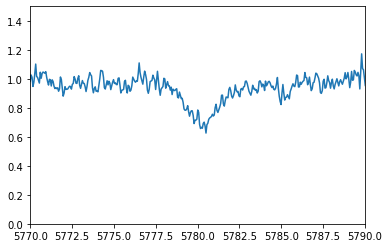

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(data_1['col0'], data_1['col1'])
plt.xlim(5770, 5790)
plt.ylim(0, 1.5)

In [ ]:
print(data_1['col1'])

[1.02003318 1.04687567 1.07226034 ... 1.0329471  1.00599007 1.0925995 ]


(0.0, 1.5)

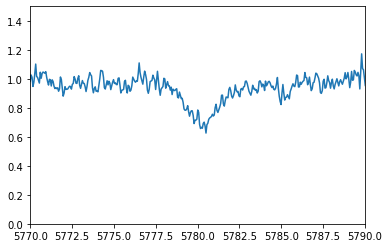

In [ ]:
data_2 = hdul[2].data
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(data_2['col0'], data_2['col1'])
plt.xlim(5770, 5790)
plt.ylim(0, 1.5)

In [ ]:
print(data_2['col1'])

[0.99300151 1.04270336 1.0798198  ... 1.0925995  1.15912586 1.0340633 ]


(0.0, 1.5)

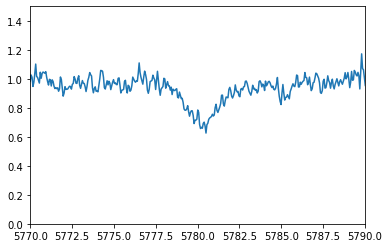

In [ ]:
data_3 = hdul[3].data
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(data_3['col0'], data_3['col1'])
plt.xlim(5770, 5790)
plt.ylim(0, 1.5)

In [ ]:
print(data_3['col1'])

[1.0003103  1.02212721 0.96275656 ... 1.02874968 1.1008546  1.08682471]


[1.0003103  1.02212721 0.96275656 ... 1.02874968 1.1008546  1.08682471]


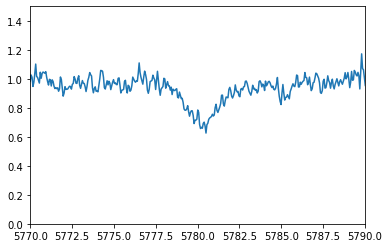

In [ ]:
data_4 = hdul[4].data
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(data_4['col0'], data_4['col1'])
plt.xlim(5770, 5790)
plt.ylim(0, 1.5)
print(data_4['col1'])